Bayesian classifier:
f_hat(x) = argmax(y in Y) (Prior: P(Y=y) * Likelihood: P(X = x/Y = y))

Approximation for this classifier
Plug-in classifier
1. Class priors: the MLE of Pi_hat_y: 
    Pi_hat_y = 1/n * sum( 1(yi=y) )
2. Class conditional densities:
    p(x/Y = y) = N(mu_y;sigma_y)
    The MLE estimate of the params
    mu_hat_y = 1/n_y * sum( 1(yi=y)*xi )
    sigma_hat_y = 1/n_y * sum( (yi=y)*(xi - mu_y)*(xi - mu_y).T )
     * 
=> f_hat(x) = argmax(on y in Y) (Pi_hat_y * det(sigma_hat_y)^(-1/2) 
                                * exp(-1/2 * (xi - mu_y).T*inv(sigma_hat_y)*(xi - mu_y)

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pathXtest = os.getcwd() + '\TestSet\X_test.csv'
pathXtrain = os.getcwd() + '\TestSet\X_train.csv'
pathYtrain = os.getcwd() + '\TestSet\Y_train.csv'

In [407]:
X_test = pd.read_csv(pathXtest, header=None)
y = pd.read_csv(pathYtrain, header=None)
x = pd.read_csv(pathXtrain, header=None)
#X.insert(loc=0, column='b', value=1)
X_test.columns = ["x2", "x1"]
x.columns = ["x2", "x1"]
y.columns = ["y"]
#Xinv = X[["b","x1","x2"]]

    Example aggregations
    data[data['item'] == 'call'].groupby('month').agg(
        # Get max of the duration column for each group
        max_duration=('duration', max),
        # Get min of the duration column for each group
        min_duration=('duration', min),
        # Get sum of the duration column for each group
        total_duration=('duration', sum),
        # Apply a lambda to date column
        num_days=("date", lambda x: (max(x) - min(x)).days)    
    )

In [278]:
#Model construction
n = x.shape[0]
d = x.shape[1]
Ny=y.groupby("y")["y"].count()
K = len(Ny)

#Class priors
piy = Ny/Ny.sum()

#Class conditional densities
x1 = pd.concat([x,y], axis=1, sort=False)
#1. Means
mu_hat_y = x1.groupby("y").agg(
    x2_hat=('x2', "mean"),
    x1_hat=('x1', "mean")
           )
#2. Covariances
#x1.loc[x1["y"]==0]
Sigma =	{}
mu_hat_y = np.array(mu_hat_y)
keys = range(K)
for i in keys:
    Sigma[i] = np.zeros((d,d))
for i in x1.iterrows():
    cls = int(i[1]["y"])
    xi_cntr = np.array([i[1][["x1","x2"]]]) - np.array([mu_hat_y[cls]])
    Sigma[i[1]["y"]] += np.dot(xi_cntr.T,xi_cntr)
for i in keys:
    Sigma[i] = Sigma[i]/Ny[i]

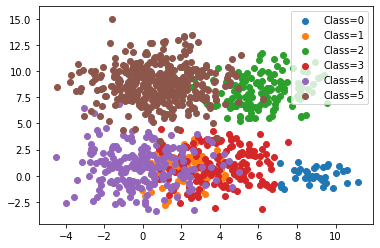

In [303]:
##### Plot data
for i in keys:
    plt.scatter(x1["x1"].loc[x1["y"]==i], x1["x2"].loc[x1["y"]==i], c="C"+str(i), label="Class="+str(i))
plt.legend()

In [395]:
#Objective function, f(y)
def objF(piy, Sigma, mu_hat_y, x, K):
    y = np.zeros((K, 1))
    for i in range(K):
        x_ctr = x - mu_hat_y[i]
        invSigma = np.linalg.inv(Sigma[i])
        y[i] = piy[i]*np.linalg.det(Sigma[i])**(-0.5)*np.exp(-0.5*
                                                             np.dot(x_ctr,
                                                                    np.dot(invSigma, x_ctr.T)))
    return y

[0.42743303 9.73534864]
5
[2.97074898 3.32761821]
3
[1.45209598 7.34991049]
5
[7.33929102 9.53504923]
2
[0.06742667 1.05811625]
4


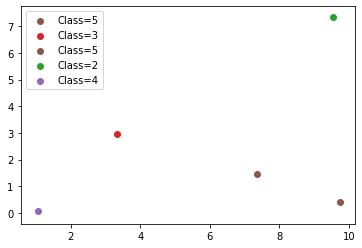

In [419]:
#Prediction
#plt.scatter(X_test["x1"], X_test["x2"])
for i in range(len(X_test)):
    x0 = np.array(X_test)[i]
    yk = objF(piy, Sigma, mu_hat_y, x0, K)
    f_hat_x = np.argmax(yk)
    print(x0)
    print(f_hat_x)
    plt.scatter(x0[1], x0[0], c="C"+str(f_hat_x), label="Class="+str(f_hat_x))
plt.legend()

In [387]:
x0

array([0.42743303, 9.73534864])

In [417]:
len(X_test)

5